# Data Exploration

This notebook contains data exploration and preprocessing before running experiments.

### Setup

In [1]:
import sys

sys.path.append(r"..")

In [17]:
import joblib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from src.plotting import plot_hardness

In [3]:
plt.rcParams["figure.figsize"] = (16, 10)

### Data

In [4]:
measurements_df = pd.read_csv(r"../data/measurements.csv")
measurements_df.head()

,Sample,Distance,Hardness,Mixing,Eletric Current,Speed,Beads,Bead Type
0,1C1,0.5,394,20.943613,136,10,1,Single
1,1C1,1.0,422,20.943613,136,10,1,Single
2,1C1,1.5,433,20.943613,136,10,1,Single
3,1C1,2.0,440,20.943613,136,10,1,Single
4,1C1,2.5,205,20.943613,136,10,1,Single


In [5]:
measurements_df.describe().applymap(lambda value: f"{value:.2f}")

,Distance,Hardness,Mixing,Eletric Current,Speed,Beads
count,456.00,456.00,456.00,456.00,456.00,456.00
mean,5.00,265.74,21.78,170.00,10.00,1.75
std,2.74,169.95,7.58,19.65,1.16,0.43
min,0.50,104.00,7.97,136.00,8.00,1.00
25%,2.50,139.75,16.25,170.00,10.00,1.75
50%,5.00,153.50,21.14,170.00,10.00,2.00
75%,7.50,472.00,26.23,170.00,10.00,2.00
max,9.50,628.00,39.03,204.00,12.00,2.00


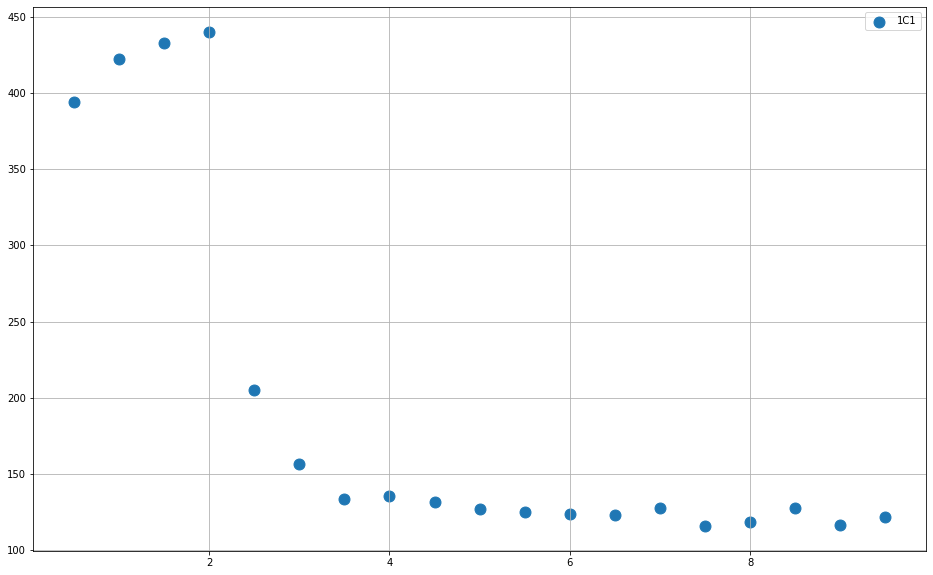

In [6]:
plot_hardness("1C1", measurements_df)

### Preprocessing

Preprocessing the dataset using following steps:
* Encode Bead Type feature
* Use mean substitution and standard scaling for all features

In [7]:
encoder = preprocessing.LabelEncoder()
measurements_df["Bead Type Feature"] = encoder.fit_transform(measurements_df["Bead Type"].values)

Select 3 samples as test data (each material sample is 19 data points). <br>
Samples were drawn randomly, but kept constant for all experiments.

In [8]:
sample_names = measurements_df["Sample"].unique()
# Samples drawn in first run of function were: {"6C3", "2C1", "3C2 L"}
test_samples = sample_names[np.random.randint(0, len(sample_names), 3)]

In [9]:
test_df = measurements_df.loc[measurements_df["Sample"].isin(test_samples)]
measurements_df = measurements_df.loc[~measurements_df["Sample"].isin(test_samples)]
len(test_df), len(measurements_df)

(57, 399)

Split remaining data into test and validation sets with 70-30 ratio.

In [10]:
train_df, validation_df = train_test_split(measurements_df, test_size=0.3, random_state=40)

Create two preprocessing objects, for features and labels.

In [11]:
feature_preprocessor = preprocessing.StandardScaler(with_mean=True, with_std=True)
target_preprocessor = preprocessing.StandardScaler(with_mean=True, with_std=True)

Store preprocessor objects to be reused for inverse transformation

In [18]:
joblib.dump(feature_preprocessor, r"../models/feature_preprocessor.joblib")
joblib.dump(target_preprocessor, r"../models/target_preprocessor.joblib")

['../models/target_preprocessor.joblib']

Select columns used for features and targets

In [12]:
feature_columns = ["Distance", "Electric Current", "Speed", "Beads", "Bead Type Feature"]
target_columns = ["Hardness"]

Fit and transform training data.

In [13]:
train_df[feature_columns] = feature_preprocessor.fit_transform(train_df[feature_columns])
train_df[target_columns] = target_preprocessor.fit_transform(train_df[target_columns])

Transform validation and test data using fitted scalers. <br>
Do not transform targets for validation and test set, predictions will be inversly transformed to evaluate the model.

In [14]:
validation_df[feature_columns] = feature_preprocessor.transform(validation_df[feature_columns])
test_df[feature_columns] = feature_preprocessor.transform(test_df[feature_columns])

Store resulting data frames into files

In [16]:
train_df[feature_columns + target_columns].to_csv(r"../data/train.csv", index=False)
validation_df[feature_columns + target_columns].to_csv(r"../data/validation.csv", index=False)
test_df[feature_columns + target_columns].to_csv(r"../data/test.csv", index=False)